In [166]:
import pandas as pd
import numpy as np
# import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
import autosklearn.classification
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [167]:
# iris = sklearn.datasets.load_iris()

# df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/attention.csv')
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv')
target = 'kind'

X = df.drop(target, axis=1)
X = df.iloc[:, 2:5]
y = df[target]

In [168]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [169]:
X.shape

(90, 3)

In [170]:
# df.head(3)
X.head()

,diet,pulse,time
0,low fat,85,1 min
1,low fat,85,15 min
2,low fat,88,30 min
3,low fat,90,1 min
4,low fat,92,15 min


In [171]:
X['diet'] = LabelEncoder().fit_transform(X['diet'])
X['time'] = LabelEncoder().fit_transform(X['time'])
y = LabelEncoder().fit_transform(y)

In [173]:
X.head()

,diet,pulse,time
0,0,85,0
1,0,85,1
2,0,88,2
3,0,90,0
4,0,92,1


In [174]:
def run_train_test_split(df, target):
    from sklearn.cross_validation import train_test_split
    test_size = 0.2
    
    print("Train/test split executed, test size =", test_size)
    return train_test_split(df, target, test_size=test_size)

X_train, X_test, y_train, y_test = run_train_test_split(X, y)

print(X_train[:5])

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Train/test split executed, test size = 0.2
    diet  pulse  time
9      0     80     0
3      0     90     0
87     1     99     0
74     0    116     2
43     0     96     1
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(72, 3) (72,)
(18, 3) (18,)


In [175]:
# X = np.ascontiguousarray(X)
# X[0:5]

In [176]:
X_train[:5]

array([[  0,  80,   0],
       [  0,  90,   0],
       [  1,  99,   0],
       [  0, 116,   2],
       [  0,  96,   1]])

In [177]:
y_train[:5]

array([0, 0, 1, 1, 2])

In [178]:
y.shape

(90,)

In [179]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=10, 
                                                          per_run_time_limit=1, 
                                                          ml_memory_limit=10000)
automl.fit(X_train, y_train)
# automl.fit(X, y)


[INFO] [2016-10-02 22:40:28,293:AutoML(1):70325cfb5d709144d4f468593e2e0ff5] Starting to create dummy predictions.
[INFO] [2016-10-02 22:40:28,330:AutoML(1):70325cfb5d709144d4f468593e2e0ff5] Finished creating dummy prediction 1/2.
[INFO] [2016-10-02 22:40:28,368:AutoML(1):70325cfb5d709144d4f468593e2e0ff5] Finished creating dummy prediction 2/2.
[INFO] [2016-10-02 22:40:29,100:AutoML(1):70325cfb5d709144d4f468593e2e0ff5] Start Ensemble with  9.18sec time left
[INFO] [2016-10-02 22:40:29,110:AutoML(1):70325cfb5d709144d4f468593e2e0ff5] Start SMAC with  9.17sec time left
[ERROR] [2016-10-02 22:40:29,133:EnsembleBuilder(1):70325cfb5d709144d4f468593e2e0ff5] Model only predicts at random: /tmp/autosklearn_tmp_10947_6542/.auto-sklearn/predictions_ensemble/predictions_ensemble_1_00001.npy has score: 0.0
[ERROR] [2016-10-02 22:40:29,137:EnsembleBuilder(1):70325cfb5d709144d4f468593e2e0ff5] Model only predicts at random: /tmp/autosklearn_tmp_10947_6542/.auto-sklearn/predictions_ensemble/predictions_

/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


[INFO] [2016-10-02 22:40:30,254:AutoMLSMBO(1)::70325cfb5d709144d4f468593e2e0ff5] Calculating Metafeatures (categorical attributes) took  0.02
[INFO] [2016-10-02 22:40:30,287:AutoMLSMBO(1)::70325cfb5d709144d4f468593e2e0ff5] Calculating Metafeatures (encoded attributes) took  0.02sec


/Users/alex/anaconda/envs/p3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[INFO] [2016-10-02 22:40:30,421:AutoMLSMBO(1)::70325cfb5d709144d4f468593e2e0ff5] Time left for 70325cfb5d709144d4f468593e2e0ff5 after finding initial configurations:  6.86sec
[INFO] [2016-10-02 22:40:30,424:AutoMLSMBO(1)::70325cfb5d709144d4f468593e2e0ff5] Metafeatures for dataset 70325cfb5d709144d4f468593e2e0ff5uiaeo
  SkewnessMean: 0.602455006042
  PercentageOfMissingValues: 0.0
  NumberOfMissingValues: 0.0
  DatasetRatio: 0.041666666666666664
  NumberOfClasses: 3.0
  LogDatasetRatio: -3.17805383035
  NumberOfInstancesWithMissingValues: 0.0
  KurtosisMin: -1.97202797203
  SymbolsMin: 0
  SymbolsSum: 0.0
  NumberOfCategoricalFeatures: 0
  ClassProbabilityMean: 0.333333333333
  RatioNominalToNumerical: 0.0
  ClassProbabilitySTD: 0.0113402302907
  SymbolsSTD: 0
  NumberOfFeatures: 3.0
  InverseDatasetRatio: 24.0
  KurtosisSTD: 2.11361336151
  SymbolsMean: 0
  ClassEntropy: 1.58412736601
  KurtosisMax: 2.7034156422
  LogInverseDatasetRatio: 3.17805383035
  RatioNumericalToNominal: 0.0
  L

In [180]:
print(automl.score(X_test,y_test))

0.0833333333333


In [181]:
predictions = automl.predict(X_test)
# predictions = automl.predict(X)
predictions

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2])

In [182]:
probas = automl.predict_proba(X_test)
# probas = automl.predict_proba(X)
probas[0:5, :]

array([[ 0.81      ,  0.02      ,  0.17      ],
       [ 0.        ,  0.92      ,  0.08      ],
       [ 0.44916667,  0.02      ,  0.53083333],
       [ 0.74      ,  0.        ,  0.26      ],
       [ 0.695     ,  0.01      ,  0.295     ]])

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0 4]
 [0 4 1]
 [6 0 0]]
Normalized confusion matrix
[[ 0.43  0.    0.57]
 [ 0.    0.8   0.2 ]
 [ 1.    0.    0.  ]]


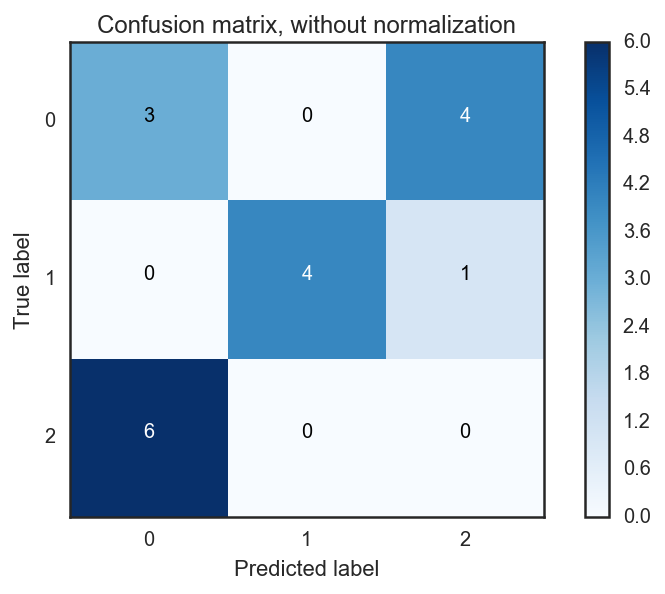

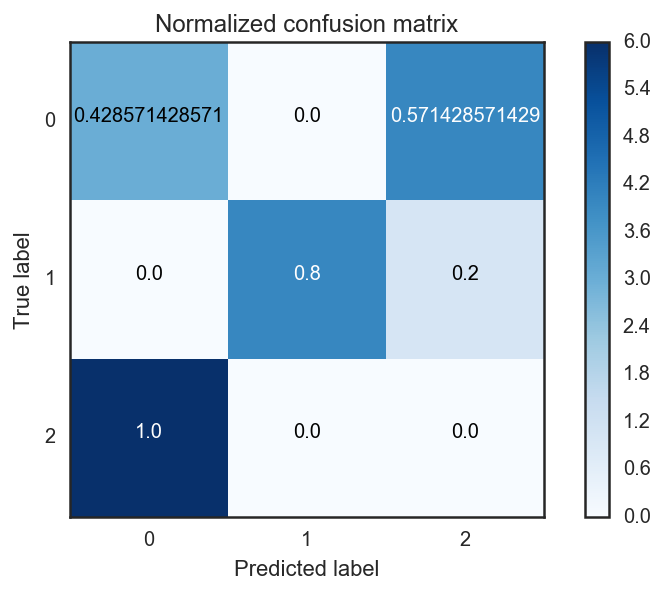

In [188]:
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.style.use('seaborn-white')
class_names = np.unique(y)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')